**Importing the Libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier








**Loading the data**

In [2]:
file_path = "/content/diabetes.csv"
data = pd.read_csv(file_path)

**Exploratory Data Analysis**

In [3]:
# Checking the first few rows of the data set
print("First few rows of the dataset:")
print(data.head())

# Displaying the summary of dataset
print("\n summary of the dataset:")
print(data.describe())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 summary of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578

In [4]:
# Checking the first few rows of the data set
print("First few rows of the dataset:")
print(data.head())

# Displaying the summary of dataset
print("\n summary of the dataset:")
print(data.describe())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 summary of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578

In [5]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


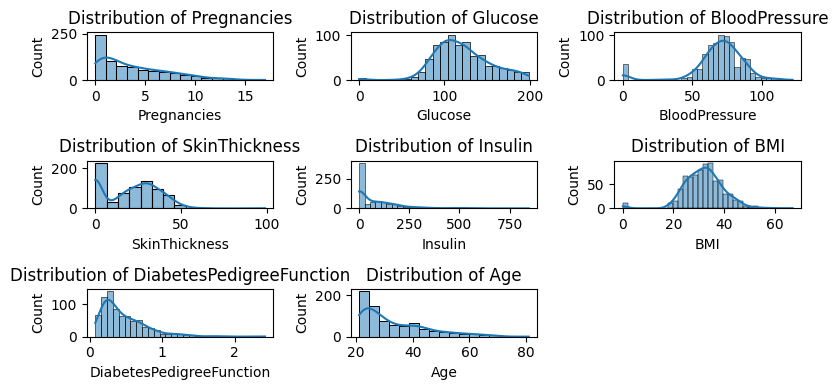

In [6]:
#Plotting histograms to understand the distribution of all predictors
def plot_distribution(data, columns):
    plt.figure(figsize=(8, 4))
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
    plt.tight_layout()
    plt.show()
plot_distribution(data, data.columns[:-1])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

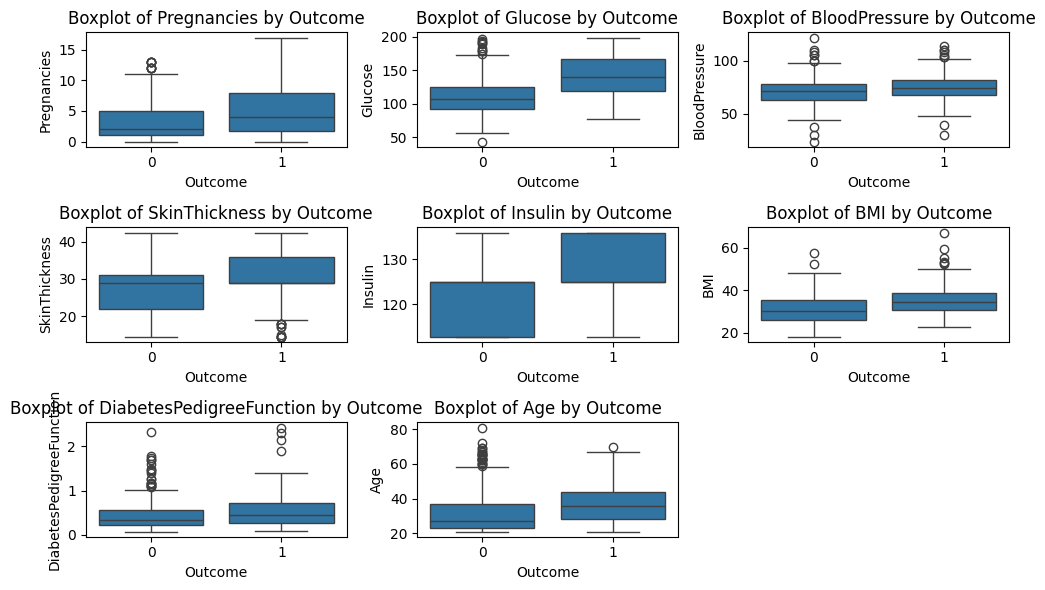

In [28]:
#Plottting Box-Plots to understand about the outliers
def plot_boxplots(data, columns):
    plt.figure(figsize=(10, 6))
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=data['Outcome'], y=data[column])
        plt.title(f"Boxplot of {column} by Outcome")
        plt.xlabel('Outcome')
        plt.ylabel(column)
    plt.tight_layout()
    plt.show()
plot_boxplots(data, data.columns[:-1])

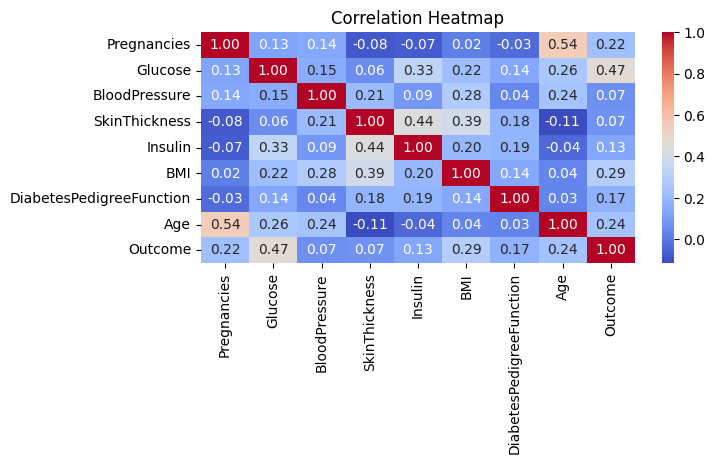

In [8]:
#Getting correlation heatmap
plt.figure(figsize=(7, 3))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Pre-Processing**

In [9]:
# Imputing the 0 values with Null and then replacing null values with median values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column] = data[column].replace(0, np.nan)
    data[column].fillna(data[column].median(), inplace=True)


<ipython-input-9-2f8e397ab9dd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [10]:
# Splitting the data into features and target variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [11]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Baseline Perceptron Model**

In [12]:
# Fitting the baseline perceptron model
perceptron = Perceptron(random_state=16)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.66
Confusion Matrix:
[[81 18]
 [34 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        99
           1       0.54      0.38      0.45        55

    accuracy                           0.66       154
   macro avg       0.62      0.60      0.60       154
weighted avg       0.65      0.66      0.65       154



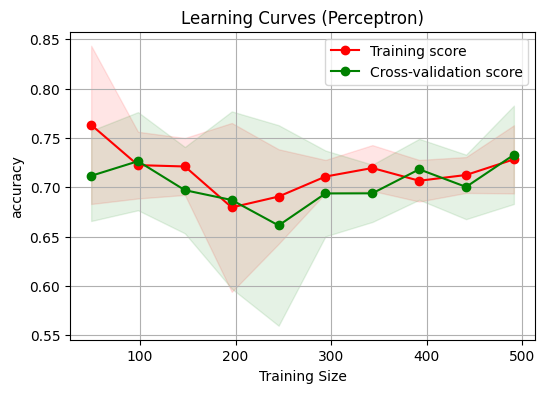

In [13]:
# plotting the  Learning Curves for the Perceptron model
def plot_learning_curve(estimator, X, y, cv, scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.title("Learning Curves (Perceptron)")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training Size")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Using StratifiedKFold for balanced cross-validation in learning curve plotting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)


plot_learning_curve(perceptron, X_train, y_train, cv=cv)

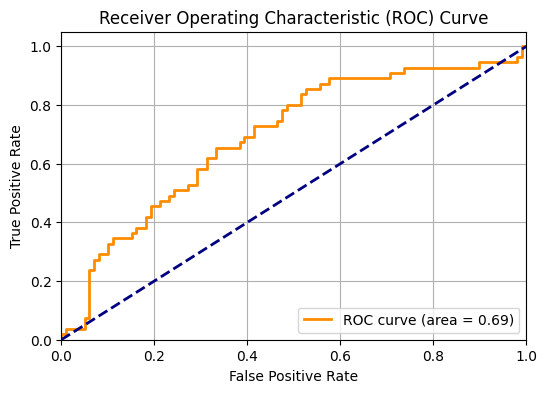

In [14]:
# plotting ROC Curve
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.decision_function(X_test)  # Use decision_function for perceptron to get the scores
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()



plot_roc_curve(perceptron, X_test, y_test)


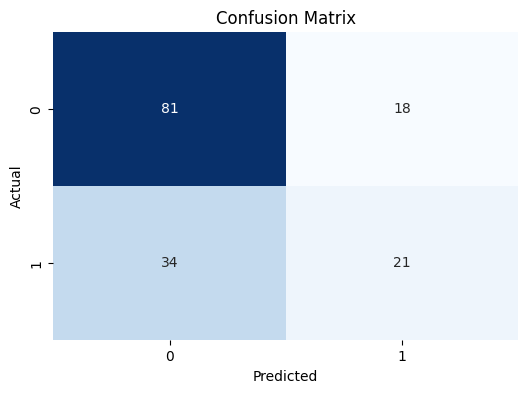

In [15]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Methods for improving accuracy**

***1. Hyper parametric optimisation***

In [16]:
# Defining a parameter grid
param_grid = {
    'penalty': ['l2', 'elasticnet'],
    'alpha': [0.00001, 0.0001, 0.001],
    'max_iter': [2000, 3000, 4000],
    'eta0': [0.1, 0.2, 0.3],
    'tol': [1e-4],
    'early_stopping': [True],
    'fit_intercept': [True],
    'random_state': [32]
}

# Use Stratified K-Fold for balanced cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)

# Initialize the Grid Search with stratified cross-validation
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score from the Grid Search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

# Evaluate the tuned model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the performance metrics
print(f"\nAccuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.3, 'fit_intercept': True, 'max_iter': 2000, 'penalty': 'l2', 'random_state': 32, 'tol': 0.0001}
Best Cross-Validation Score: 0.70

Accuracy: 0.77
Confusion Matrix:
[[81 18]
 [17 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


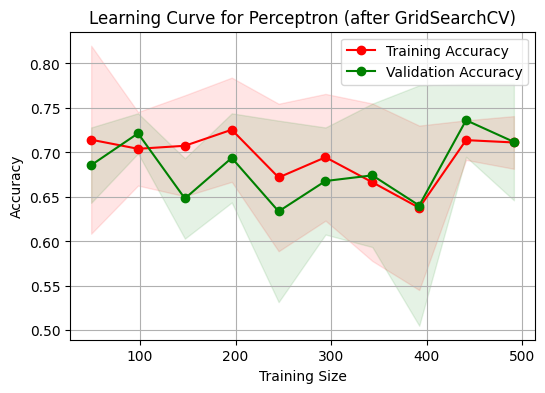

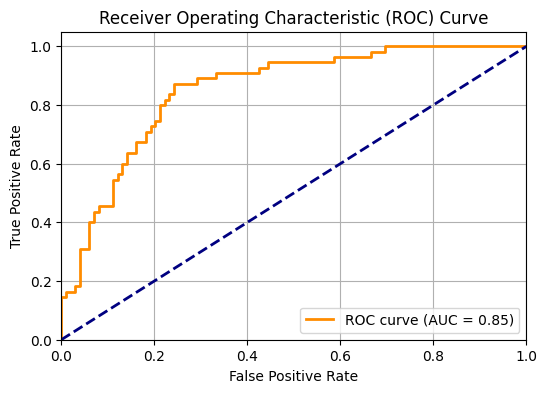

<Figure size 600x400 with 0 Axes>

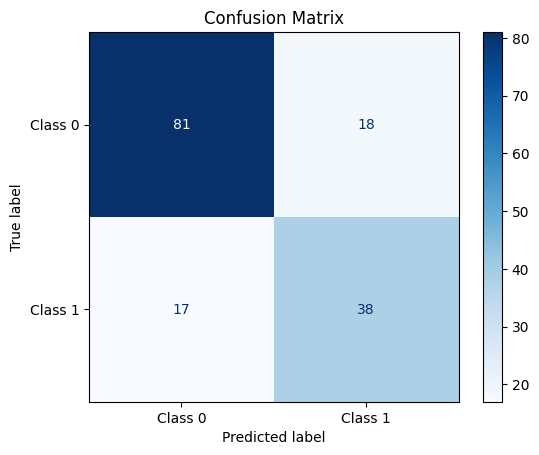

In [17]:
# plotting the learning curve
def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve for Perceptron (after GridSearchCV)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plotting ROC Curve
def plot_roc_curve(model, X_test, y_test):
    if hasattr(model, "decision_function"):  # Check if the model supports decision_function
        y_scores = model.decision_function(X_test)  # For models like Perceptron that don't have predict_proba
    else:
        y_scores = model.predict_proba(X_test)[:, 1]  # Use predict_proba if available (e.g., logistic regression)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Plotting Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test):
    plt.figure(figsize=(6, 4))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()

# Call the functions to plot the curves and confusion matrix
plot_learning_curve(best_model, X_train, y_train, cv=cv)
plot_roc_curve(best_model, X_test, y_test)
plot_confusion_matrix(best_model, X_test, y_test)


***2. Using Ensemeble Methods - Bagging and Boosting***

***2a. Bagging***

In [18]:
# Create the Bagging ensemble using the perceptron as the base estimator
bagging_model = BaggingClassifier(
    estimator=perceptron,
    n_estimators=50,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=16
)

# Fit the Bagging model to the training data
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the performance of the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_report_bagging = classification_report(y_test, y_pred_bagging)

# Print performance metrics
print(f"\nBagging Perceptron Accuracy: {accuracy_bagging:.2f}")
print("Confusion Matrix:")
print(conf_matrix_bagging)
print("\nClassification Report:")
print(class_report_bagging)



Bagging Perceptron Accuracy: 0.76
Confusion Matrix:
[[80 19]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



***2b. Boosting***

In [19]:
# 2. Boosting with Perceptron (AdaBoost with SAMME algorithm)
adaboost_model = AdaBoostClassifier(
    estimator=perceptron,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=16
)

# Fit the AdaBoost model to the training data
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate AdaBoost model performance
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"\nAdaBoost Perceptron Accuracy: {accuracy_adaboost:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adaboost))




AdaBoost Perceptron Accuracy: 0.66
Confusion Matrix:
[[74 25]
 [27 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        99
           1       0.53      0.51      0.52        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154




Bagging Model Performance Analysis
Accuracy: 0.76


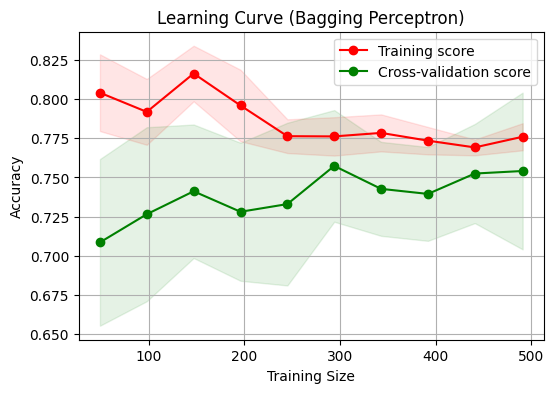

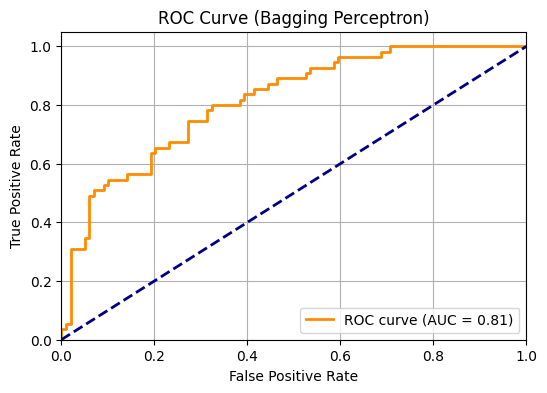

<Figure size 600x400 with 0 Axes>

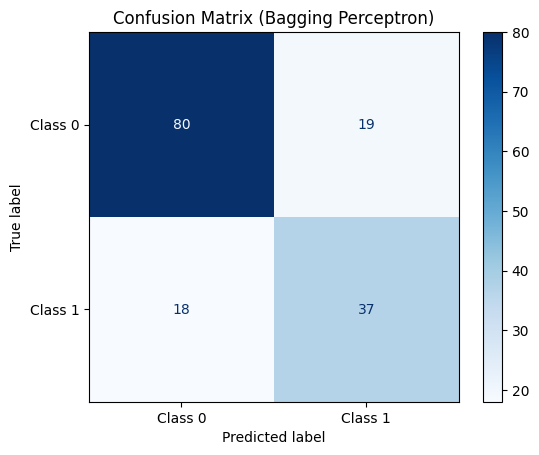


AdaBoost Model Performance Analysis
Accuracy: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py", line 169, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "

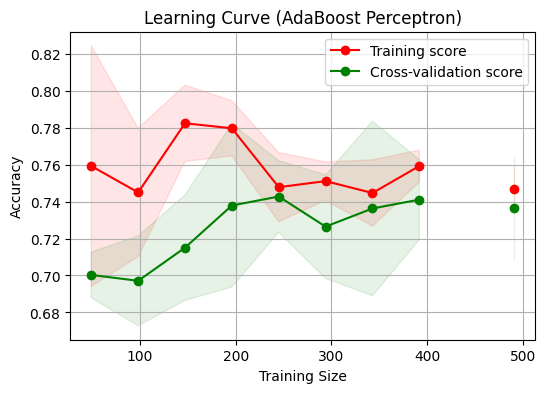

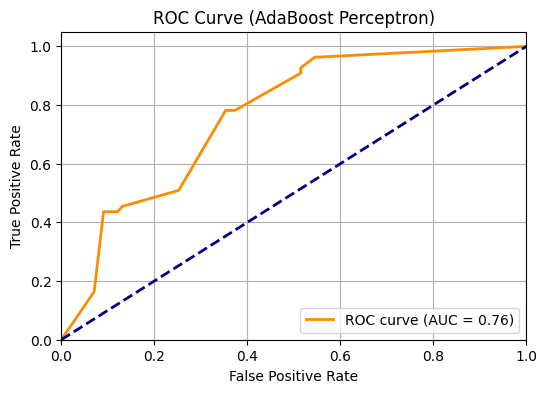

<Figure size 600x400 with 0 Axes>

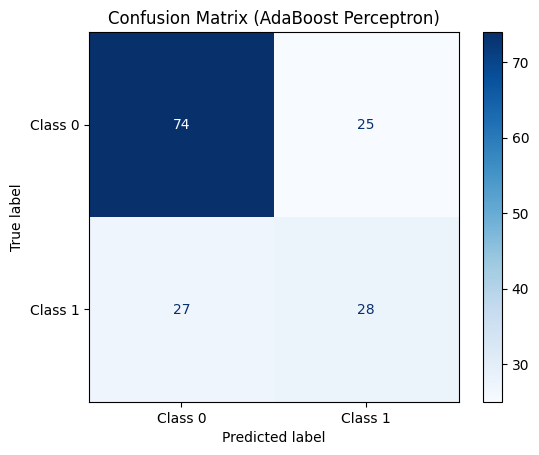

In [20]:
# Function to plot the Learning Curve
def plot_learning_curve(estimator, X, y, cv, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Function to plot the ROC Curve
def plot_roc_curve(model, X_test, y_test, title):
    y_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Function to plot the Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    plt.figure(figsize=(6, 4))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Class 0', 'Class 1'], cmap=plt.cm.Blues)
    plt.title(title)
    plt.grid(False)
    plt.show()

# Use Stratified K-Fold for consistent evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)

# Plot Learning Curve, ROC Curve, and Confusion Matrix for Bagging Model
print("\nBagging Model Performance Analysis")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.2f}")
plot_learning_curve(bagging_model, X_train, y_train, cv=cv, title="Learning Curve (Bagging Perceptron)")
plot_roc_curve(bagging_model, X_test, y_test, title="ROC Curve (Bagging Perceptron)")
plot_confusion_matrix(bagging_model, X_test, y_test, title="Confusion Matrix (Bagging Perceptron)")

# Plot Learning Curve, ROC Curve, and Confusion Matrix for AdaBoost Model
print("\nAdaBoost Model Performance Analysis")
print(f"Accuracy: {accuracy_score(y_test, y_pred_adaboost):.2f}")
plot_learning_curve(adaboost_model, X_train, y_train, cv=cv, title="Learning Curve (AdaBoost Perceptron)")
plot_roc_curve(adaboost_model, X_test, y_test, title="ROC Curve (AdaBoost Perceptron)")
plot_confusion_matrix(adaboost_model, X_test, y_test, title="Confusion Matrix (AdaBoost Perceptron)")


***3.Doing Data Preperocessing improvements and Feature engineering***

In [21]:
# Imputing the zero values in colums with respective medians of the columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column] = data[column].replace(0, np.nan)
    data[column].fillna(data[column].median(), inplace=True)

#Identifying and capping the outliers using IQR Method
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

#Handling outliers of the columns which have significant outliers
outlier_columns = ['SkinThickness', 'Insulin']
for column in outlier_columns:
    cap_outliers(data, column)

#Feature scaling using Robust Scaler because it is less sensitive to outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = scaler.fit_transform(X)

#Doing Feature engineering: Adding polynomial features to capture non-linear relationships
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Evaluating the model's performance after improvement
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.77
Confusion Matrix:
[[81 18]
 [17 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



<ipython-input-21-5703d74f769c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


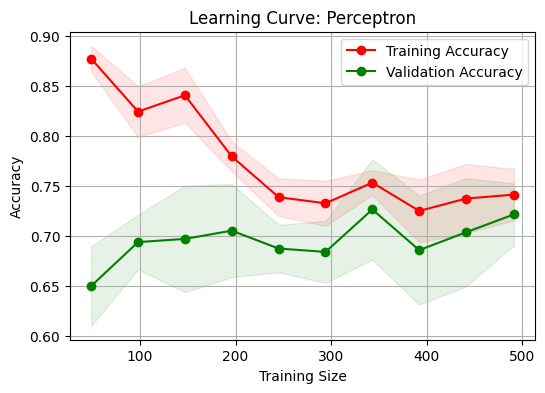

In [22]:
# Use Stratified K-Fold for cross-validation in learning curves
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to plot the learning curve
def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.title("Learning Curve: Perceptron")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Call the learning curve plotting function
plot_learning_curve(perceptron, X_train, y_train, cv)

# Fit the Perceptron model to the training data
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)




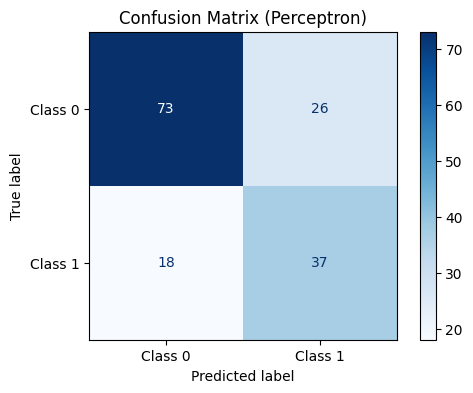

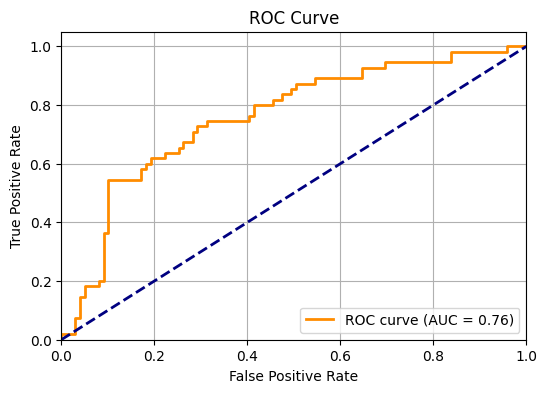

In [23]:
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

# Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

    fig, ax = plt.subplots(figsize=(6, 4))
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)
    plt.title(title)
    plt.grid(False)
    plt.show()

# ROC Curve
def plot_roc_curve(model, X_test, y_test):
    y_score = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(perceptron, X_test, y_test, "Confusion Matrix (Perceptron)")

# Plot the ROC curve
plot_roc_curve(perceptron, X_test, y_test)


***4. Feature Selection***

***4a. RFE-Recursive Feature Selection***



In [24]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=perceptron, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Transform the training and test data to only include selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the Perceptron model on the selected features
perceptron.fit(X_train_rfe, y_train)
y_pred_rfe = perceptron.predict(X_test_rfe)

# Evaluate the model's performance
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
class_report_rfe = classification_report(y_test, y_pred_rfe)

# Display the results
print(f"\nAccuracy after RFE: {accuracy_rfe:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rfe)
print("\nClassification Report:")
print(class_report_rfe)



Accuracy after RFE: 0.78
Confusion Matrix:
[[89 10]
 [24 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



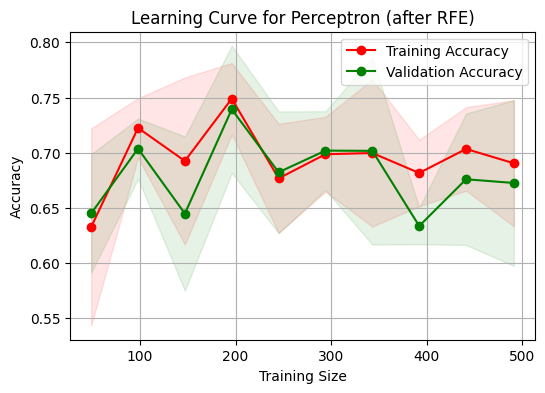

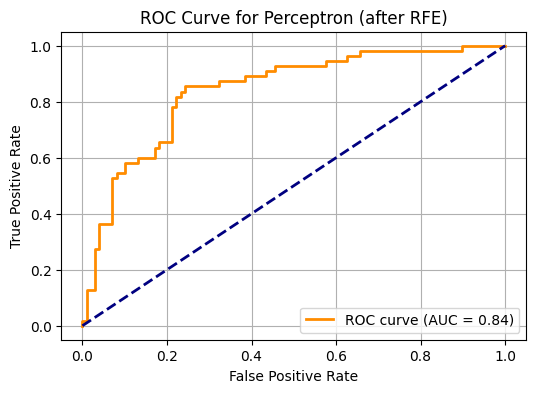

<Figure size 600x400 with 0 Axes>

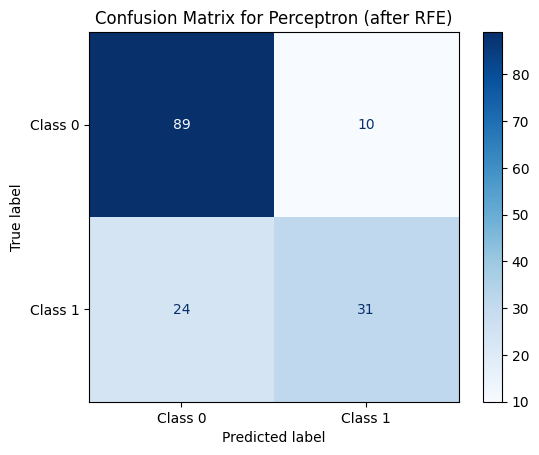

In [25]:
# 1. Learning Curve Visualization
def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve for Perceptron (after RFE)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot the learning curve
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)
plot_learning_curve(perceptron, X_train_rfe, y_train, cv)

# 2. ROC Curve Visualization
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Perceptron (after RFE)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot the ROC curve
plot_roc_curve(perceptron, X_test_rfe, y_test)

# 3. Confusion Matrix Visualization
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

    plt.figure(figsize=(6, 4))
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title("Confusion Matrix for Perceptron (after RFE)")
    plt.grid(False)
    plt.show()

# Plot the confusion matrix for the model
plot_confusion_matrix(perceptron, X_test_rfe, y_test)

***4b. K-Best Feature Selection***

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Univariate Feature Selection using ANOVA F-value
k_best_selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_kbest = k_best_selector.fit_transform(X_train, y_train)
X_test_kbest = k_best_selector.transform(X_test)

# Fit the Perceptron model on the selected features
perceptron = Perceptron(random_state=16)
perceptron.fit(X_train_kbest, y_train)
y_pred_kbest = perceptron.predict(X_test_kbest)

# Evaluate the model's performance
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
conf_matrix_kbest = confusion_matrix(y_test, y_pred_kbest)
class_report_kbest = classification_report(y_test, y_pred_kbest)

# Display the results
print(f"\nAccuracy after SelectKBest: {accuracy_kbest:.2f}")
print("Confusion Matrix:")
print(conf_matrix_kbest)
print("\nClassification Report:")
print(class_report_kbest)



Accuracy after SelectKBest: 0.69
Confusion Matrix:
[[75 24]
 [23 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        99
           1       0.57      0.58      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154



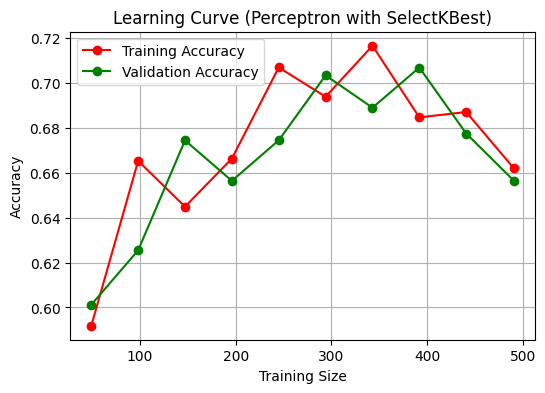

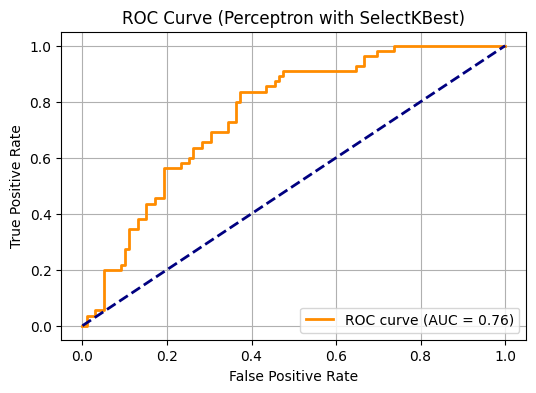

<Figure size 600x400 with 0 Axes>

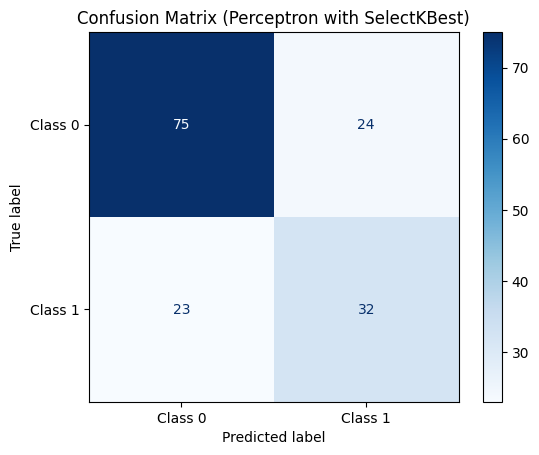

In [27]:
# 1. Learning Curve Visualization
def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve (Perceptron with SelectKBest)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot the learning curve
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)
plot_learning_curve(perceptron, X_train_kbest, y_train, cv)

# 2. ROC Curve Visualization
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Perceptron with SelectKBest)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot the ROC curve
plot_roc_curve(perceptron, X_test_kbest, y_test)

# 3. Confusion Matrix Visualization
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

    plt.figure(figsize=(6, 4))
    disp.plot(cmap=plt.cm.Blues, colorbar=True)
    plt.title("Confusion Matrix (Perceptron with SelectKBest)")
    plt.grid(False)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(perceptron, X_test_kbest, y_test)